# Modules

In [1]:
#!pip install geonamescache
import tweepy
import numpy
import pandas as pd
import requests
from bs4 import BeautifulSoup
import importlib
import json
from helper import *
from selenium import webdriver
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import linear_model
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
pd.options.display.max_columns = 200

## First Impressions

we will connect all of the data frames we have created into one

In [3]:
df=pd.read_csv("out.csv")
df=pd.concat([df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")])
df

,Unnamed: 0,name,age,city,country,gender,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtags,hashtag count,trending,using trends?,link to tweet
0,0,CamuyArenas_AA,NaN,Puente,United States,NaN,3.2,228,50,22,0.440000,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,0,11,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CamuyArenas_AA/status/...
1,1,16p11dot2ds,NaN,Georgia,United States,NaN,4.9,32312,33,481,14.575758,False,This is a prep free zone. https://t.co/2qqlLxy...,336,1,0,0,1,8,True,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/16p11dot2ds/status/161...
2,2,PoopScoopSF,NaN,Downtown,United States,NaN,4.7,163626,415,125,0.301205,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,0,1,10,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/PoopScoopSF/status/161...
3,3,wchazz,NaN,Wesley Chapel,United States,NaN,15.4,48876,377,951,2.522546,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,0,10,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wchazz/status/16139885...
4,4,wyatthebson,NaN,Pier 17,United States,NaN,16.8,24061,1366,4999,3.659590,False,Listen to PODCAST #6 SGUZR by Core Beats on Tn...,13,0,0,0,0,11,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wyatthebson/status/161...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301,9301,arshadzackeriya,NaN,Wellington City,New Zealand,NaN,14.0,1022,289,482,1.667820,False,Stay tuned; the first podcast of 2023 will lau...,141,7,0,0,0,26,False,"['DevOps', 'DevOpswithZack']",2,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/arshadzackeriya/status...
9302,9302,Ncookie98,NaN,Auckland,New Zealand,NaN,11.3,133568,121,516,4.264463,False,ถ้าปัดทินเดอร์ไปก็คงไม่เจอน้องหรอก เพราะน่าจะอ...,5,0,0,0,0,2,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', 'Perth', '...",False,https://www.twitter.com/Ncookie98/status/16138...
9303,9303,erimedi,NaN,Christchurch City,New Zealand,NaN,8.0,10015,190,376,1.978947,False,Irish pub in New Zealand and they’re playing c...,66,2,0,0,0,11,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",True,https://www.twitter.com/erimedi/status/1613849...
9304,9304,auralorgasm,NaN,Kapiti Coast District,New Zealand,NaN,9.8,56050,490,412,0.840816,False,Absolute parody account https://t.co/NzZ2gjb3JU,39,1,0,0,0,4,True,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/auralorgasm/status/161...


# Cleaning the data

### Removing major errors, duplicates, and outliers 

as we can see below there are many NAN values in age and gender too many to fill them out with the average or the most common.
so we have decided it is best to remove those columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48723 entries, 0 to 9305
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      48723 non-null  int64  
 1   name            48723 non-null  object 
 2   age             624 non-null    float64
 3   city            48723 non-null  object 
 4   country         48723 non-null  object 
 5   gender          0 non-null      float64
 6   acount age      48723 non-null  float64
 7   total tweets    48723 non-null  int64  
 8   followers       48723 non-null  int64  
 9   following       48723 non-null  int64  
 10  respectability  48723 non-null  float64
 11  verified        48723 non-null  bool   
 12  text            48723 non-null  object 
 13  views           48723 non-null  int64  
 14  likes           48723 non-null  int64  
 15  retweets        48723 non-null  int64  
 16  quote retweets  48723 non-null  int64  
 17  comments        48723 non-null  

In [5]:
df=df.drop(["age", "gender",'Unnamed: 0'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48723 entries, 0 to 9305
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            48723 non-null  object 
 1   city            48723 non-null  object 
 2   country         48723 non-null  object 
 3   acount age      48723 non-null  float64
 4   total tweets    48723 non-null  int64  
 5   followers       48723 non-null  int64  
 6   following       48723 non-null  int64  
 7   respectability  48723 non-null  float64
 8   verified        48723 non-null  bool   
 9   text            48723 non-null  object 
 10  views           48723 non-null  int64  
 11  likes           48723 non-null  int64  
 12  retweets        48723 non-null  int64  
 13  quote retweets  48723 non-null  int64  
 14  comments        48723 non-null  int64  
 15  word count      48723 non-null  int64  
 16  is quote        48723 non-null  bool   
 17  hashtags        11587 non-null  

now we can examine all of the descriptive statistics of our data frame

In [7]:
df.describe(include='all')

,name,city,country,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtags,hashtag count,trending,using trends?,link to tweet
count,48723,48723,48723,48723.000000,4.872300e+04,4.872300e+04,48723.000000,48723.000000,48723,48723,4.872300e+04,48723.000000,48723.000000,48723.000000,48723.000000,48723.000000,48723,11587,48723.000000,48723,48723,48723
unique,23803,5715,5,NaN,NaN,NaN,NaN,NaN,2,40294,NaN,NaN,NaN,NaN,NaN,NaN,2,7445,NaN,500,2,40390
top,KaimoanaVaitoh6,Auckland,United States,NaN,NaN,NaN,NaN,NaN,False,Streaming https://t.co/XvJo1bLBSq,NaN,NaN,NaN,NaN,NaN,NaN,False,['TOTP'],NaN,"['#BBCLauraK', '#sundayvibes', '#INDvSL', '#Su...",False,https://www.twitter.com/maddoxfiIms/status/161...
freq,409,3621,10586,NaN,NaN,NaN,NaN,NaN,47398,7,NaN,NaN,NaN,NaN,NaN,NaN,36728,101,NaN,1587,45992,5
mean,NaN,NaN,NaN,10.322774,6.542142e+04,5.864916e+03,1561.688422,2.047680,NaN,NaN,1.199291e+03,14.508692,1.906635,0.163229,1.146707,15.703467,NaN,NaN,0.581491,NaN,NaN,NaN
std,NaN,NaN,NaN,4.690890,7.340920e+05,1.151024e+05,7162.039717,4.934724,NaN,NaN,1.373536e+04,230.905449,35.522640,3.088480,19.474013,12.492544,NaN,NaN,1.610821,NaN,NaN,NaN
min,NaN,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.900000,2.898000e+03,2.330000e+02,256.000000,0.548090,NaN,NaN,3.700000e+01,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.600000,1.212400e+04,6.520000e+02,654.000000,1.098161,NaN,NaN,1.160000e+02,1.000000,0.000000,0.000000,0.000000,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,14.300000,3.725100e+04,1.845000e+03,1554.000000,2.149742,NaN,NaN,3.860000e+02,4.000000,0.000000,0.000000,0.000000,21.000000,NaN,NaN,0.000000,NaN,NaN,NaN


now we want to examine the value counts of each column to see if there is something we didn't see before.

In [8]:
df['country'].value_counts()

United States     10586
Australia          9580
United Kingdom     9574
New Zealand        9532
Canada             9451
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

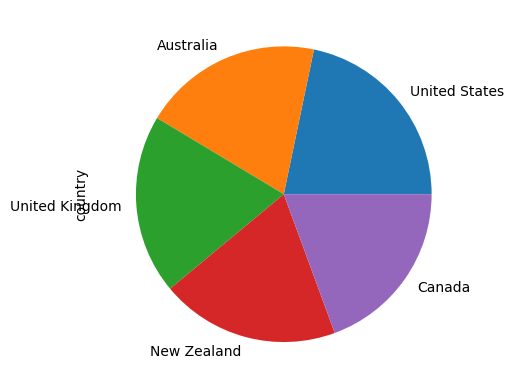

In [9]:
df['country'].value_counts().plot(kind='pie')

as planed an almoust equel amount of useres from each country.

In [10]:
df['country'].value_counts(normalize=True)

United States     0.217269
Australia         0.196622
United Kingdom    0.196499
New Zealand       0.195637
Canada            0.193974
Name: country, dtype: float64

as mentioned before, the tweets in each data frame came from the same 5 minutes so if we have 'name' duplicates 
it is probobly bots that we have decided to remove.

In [11]:
df[df['name'].duplicated()]

,name,city,country,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtags,hashtag count,trending,using trends?,link to tweet
57,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,3,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
74,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,2,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
91,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,3,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
107,findsfromyester,Denton,United States,12.2,1062969,34362,30571,0.889675,False,Check out this item in my Etsy shop https://t....,2,0,0,0,0,9,False,NaN,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/findsfromyester/status...
123,ApartmentCareer,Nashville,United States,15.0,111303,4117,3962,0.962351,False,Now Hiring: Apartment Maintenance Supervisor -...,8,0,0,0,0,18,False,['jobs'],1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/ApartmentCareer/status...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301,arshadzackeriya,Wellington City,New Zealand,14.0,1022,289,482,1.667820,False,Stay tuned; the first podcast of 2023 will lau...,141,7,0,0,0,26,False,"['DevOps', 'DevOpswithZack']",2,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/arshadzackeriya/status...
9302,Ncookie98,Auckland,New Zealand,11.3,133568,121,516,4.264463,False,ถ้าปัดทินเดอร์ไปก็คงไม่เจอน้องหรอก เพราะน่าจะอ...,5,0,0,0,0,2,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', 'Perth', '...",False,https://www.twitter.com/Ncookie98/status/16138...
9303,erimedi,Christchurch City,New Zealand,8.0,10015,190,376,1.978947,False,Irish pub in New Zealand and they’re playing c...,66,2,0,0,0,11,False,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",True,https://www.twitter.com/erimedi/status/1613849...
9304,auralorgasm,Kapiti Coast District,New Zealand,9.8,56050,490,412,0.840816,False,Absolute parody account https://t.co/NzZ2gjb3JU,39,1,0,0,0,4,True,NaN,0,"['Paula', 'Chargers', 'Paul Henry', '#UFCVegas...",False,https://www.twitter.com/auralorgasm/status/161...


### delete dups
as we know, bots are very common on social medias, and twitter is no different.
when we extracted the tweets, we asked the twitter api to retrieve us all the tweeets that were tweeted in the last 2-5 minutes(back when we extracted them)
so that means that if we see a duplicate name, that means that it's either a person that tweeted more than once in the span of 5 minutes which isn't that common. so when we catch a duplicate name, we will assume it's a bot

In [12]:
df = pd.read_csv("out.csv")
dfl = [df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")]

for i in range(0,6):
    dfl[i].drop(["age", "gender",'Unnamed: 0'], axis=1,inplace=True)
    dfl[i].drop_duplicates(subset= 'name' ,keep = False, inplace=True)

dfn = pd.concat(dfl,ignore_index=True)

#also lets add the quote retweets to retweets
tmp = dfn['quote retweets']
for i in range(0,dfn.shape[0]):
    dfn.iloc[i,:].retweets += tmp.iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_1136\1326356946.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn.iloc[i,:].retweets += tmp.iloc[i]


almost half of the data frame was removed, but 25,000 rows is still enough for us, so we will continue 

now that our data is far more reliable 
# Analyze the data
we want to see what variables are affecting the amount of retweets
### but first let's remove everything we don't need for the analysis

all of those were useful to us until now

In [13]:
df = dfn.drop(['name','text','quote retweets','following','respectability','trending', 'link to tweet','hashtags'], axis = 1)
#df.drop('name',axis = 1,inplace = True)

column_to_move = df.pop("retweets")
df.insert(df.shape[1], "retweets", column_to_move)
df.reset_index(drop = True, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25398 entries, 0 to 25397
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           25398 non-null  object 
 1   country        25398 non-null  object 
 2   acount age     25398 non-null  float64
 3   total tweets   25398 non-null  int64  
 4   followers      25398 non-null  int64  
 5   verified       25398 non-null  bool   
 6   views          25398 non-null  int64  
 7   likes          25398 non-null  int64  
 8   comments       25398 non-null  int64  
 9   word count     25398 non-null  int64  
 10  is quote       25398 non-null  bool   
 11  hashtag count  25398 non-null  int64  
 12  using trends?  25398 non-null  bool   
 13  retweets       25398 non-null  int64  
dtypes: bool(3), float64(1), int64(8), object(2)
memory usage: 2.2+ MB


it is easy to see that our descriptive statistics had  changed .

In [15]:
df.describe(include='all')

,city,country,acount age,total tweets,followers,verified,views,likes,comments,word count,is quote,hashtag count,using trends?,retweets
count,25398,25398,25398.000000,2.539800e+04,2.539800e+04,25398,2.539800e+04,25398.000000,25398.000000,25398.000000,25398,25398.000000,25398,25398.000000
unique,5115,5,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,2,NaN
top,Melbourne,United States,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,False,NaN
freq,996,7703,NaN,NaN,NaN,24593,NaN,NaN,NaN,NaN,19319,NaN,24168,NaN
mean,NaN,NaN,10.634585,3.303246e+04,4.765975e+03,NaN,1.422459e+03,16.365422,1.275848,16.395897,NaN,0.678085,NaN,2.005670
std,NaN,NaN,4.466169,7.319027e+05,9.623955e+04,NaN,1.685605e+04,252.693576,24.856799,12.726227,NaN,1.828472,NaN,40.331396
min,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000,1.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,6.900000,2.029000e+03,2.120000e+02,NaN,4.600000e+01,0.000000,0.000000,7.000000,NaN,0.000000,NaN,0.000000
50%,NaN,NaN,11.900000,7.523000e+03,5.840000e+02,NaN,1.410000e+02,1.000000,0.000000,12.000000,NaN,0.000000,NaN,0.000000
75%,NaN,NaN,14.300000,2.278675e+04,1.622000e+03,NaN,4.630000e+02,5.000000,1.000000,23.000000,NaN,1.000000,NaN,0.000000


we will continue to examine the value count  of the columns

In [16]:
df['retweets'].value_counts()

0      20121
1       2585
2        889
3        453
4        269
       ...  
70         1
853        1
50         1
563        1
168        1
Name: retweets, Length: 137, dtype: int64

In [17]:
df[df['retweets'] > 1000].retweets.sort_values(kind = 'quicksort' )

9398     1033
19389    1125
20771    1465
22158    2021
7875     4826
Name: retweets, dtype: int64

looks like we have some outliers, let's remove them

In [18]:
df = df[df['retweets'] < 1750]

#### now lets try to find which factors are impotant when trying to know how many retweets a tweet will get

In [19]:
print(df.shape[0],df.shape[1])
df.corr()

25396 14


,acount age,total tweets,followers,verified,views,likes,comments,word count,is quote,hashtag count,using trends?,retweets
acount age,1.000000,0.015985,0.036186,0.110385,0.005374,-0.005959,-0.001265,0.014835,0.046762,-0.035107,0.030580,-0.007978
total tweets,0.015985,1.000000,0.001210,0.000921,-0.000729,-0.000844,-0.000401,-0.017388,-0.003580,-0.008207,-0.002848,-0.001139
followers,0.036186,0.001210,1.000000,0.147237,0.104634,0.056682,0.038924,0.002565,-0.007478,-0.002602,-0.004428,0.036124
verified,0.110385,0.000921,0.147237,1.000000,0.111896,0.083324,0.065390,0.046300,0.027714,-0.000500,-0.009365,0.064867
views,0.005374,-0.000729,0.104634,0.111896,1.000000,0.863691,0.647474,0.020973,-0.000113,-0.009115,-0.007368,0.772118
likes,-0.005959,-0.000844,0.056682,0.083324,0.863691,1.000000,0.750303,0.018844,-0.012782,-0.004278,-0.008756,0.822519
comments,-0.001265,-0.000401,0.038924,0.065390,0.647474,0.750303,1.000000,0.026451,-0.014881,-0.004099,-0.005072,0.593548
word count,0.014835,-0.017388,0.002565,0.046300,0.020973,0.018844,0.026451,1.000000,-0.109939,0.167082,0.037256,0.044141
is quote,0.046762,-0.003580,-0.007478,0.027714,-0.000113,-0.012782,-0.014881,-0.109939,1.000000,-0.131105,-0.059055,-0.013936
hashtag count,-0.035107,-0.008207,-0.002602,-0.000500,-0.009115,-0.004278,-0.004099,0.167082,-0.131105,1.000000,0.063513,0.012377


here we can see most of our outliers came from new ziland

United States     7703
United Kingdom    6404
Canada            4884
Australia         4378
New Zealand       2027
Name: country, dtype: int64


<AxesSubplot:ylabel='country'>

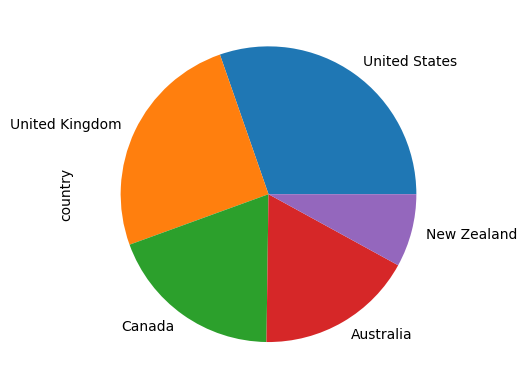

In [20]:
cvc = df.country.value_counts()
print(cvc)
cvc.plot(kind='pie')

now will cheack the amount of retweets comeing from each country

us 12813
canada 9155
uk 10652
au 6646
nz 4827
all 44093


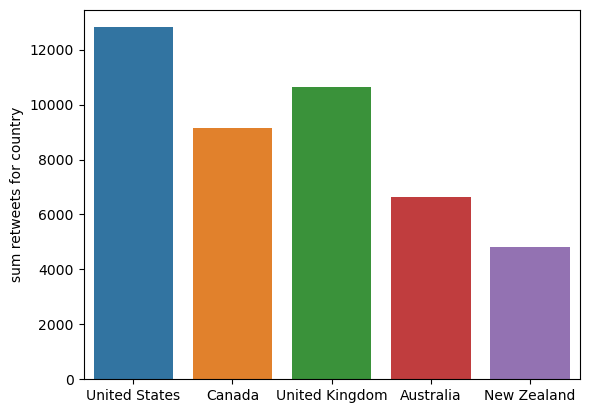

In [21]:
sns.barplot(x = ['United States','Canada','United Kingdom','Australia','New Zealand'],
        y = [df[df.country == 'United States'].retweets.sum(),
            df[df.country == 'Canada'].retweets.sum(),
            df[df.country == 'United Kingdom'].retweets.sum(),
            df[df.country == 'Australia'].retweets.sum(),
            df[df.country == 'New Zealand'].retweets.sum()])
plt.ylabel('sum retweets for country')


print('us',df[df.country == 'United States'].retweets.sum())
print('canada',df[df.country == 'Canada'].retweets.sum())
print('uk',df[df.country == 'United Kingdom'].retweets.sum())
print('au',df[df.country == 'Australia'].retweets.sum())
print('nz',df[df.country == 'New Zealand'].retweets.sum())
print('all', df.retweets.sum())

looks like the country from which the tweet came has some effect on the retweet count
this shows that the country of origin is a valid factor

Text(0.5, 0, 'is verified')

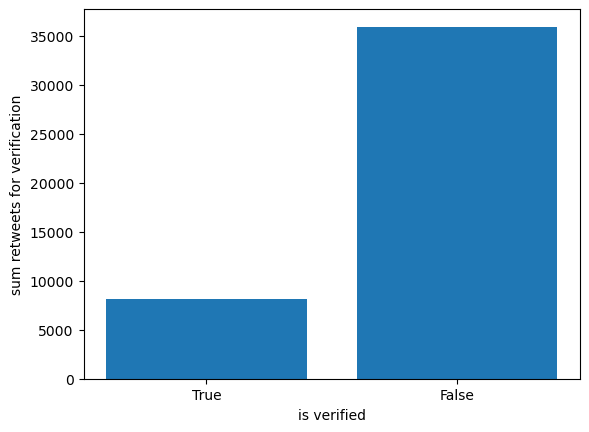

In [22]:
plt.bar(['True','False'],[df[df.verified ==  True].retweets.sum(),df[df.verified !=  True].retweets.sum()])
plt.ylabel('sum retweets for verification')
plt.xlabel('is verified')

it's not a secret that on twitter the "verification bedge" is a status symbol that is mostly reserved for the famouse and popular.
the result we got here is strange since it shows that there's almost no difference, but this is probobly the result of not enogh data.

despite what we are seeing here, we will concider this valid

next there is a scatter plote between the age of your account and the retweets and we see thete is no correlation between them

Text(0.5, 0, 'age of the account')

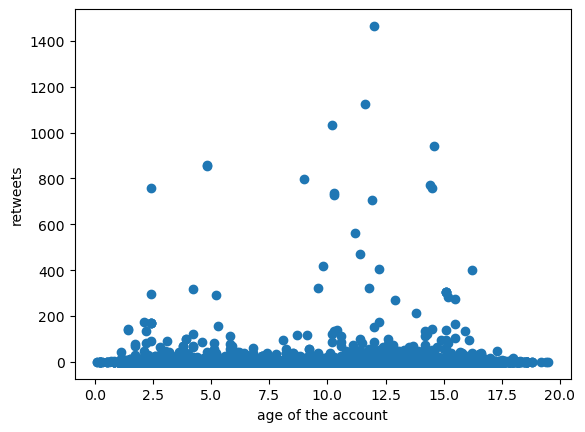

In [23]:
plt.scatter(df['acount age'],df['retweets'])
plt.ylabel('retweets')
plt.xlabel('age of the account')

account age has no correlation to the amount of retweets.
not valid

Text(0.5, 0, 'total tweets')

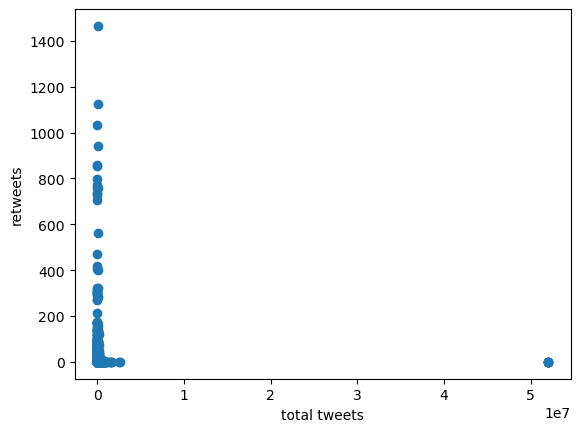

In [24]:
plt.scatter(df['total tweets'],df['retweets'])
plt.ylabel('retweets')
plt.xlabel('total tweets')

also, no correlation

Text(0.5, 0, 'followers')

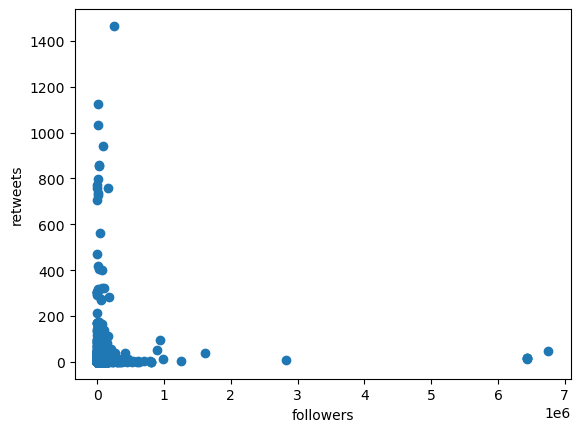

In [25]:
plt.scatter(x = df['followers'],y = df['retweets'])
plt.ylabel('retweets')
plt.xlabel('followers')

we have thoght that followers count should have a direct correlation with retweet count, it apears that the data we collected shows it is not true.
unfortunaly we will have to disregurd its effect on the retweets.

Text(0.5, 0, 'word count')

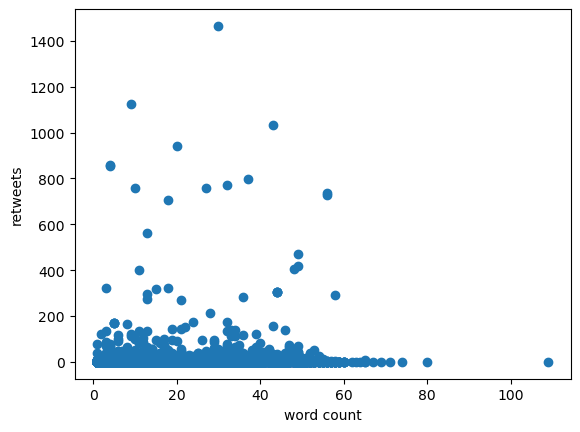

In [26]:
plt.scatter(df['word count'],df['retweets'])
plt.ylabel('retweets')
plt.xlabel('word count')

no correlation

Text(0.5, 0, 'likes')

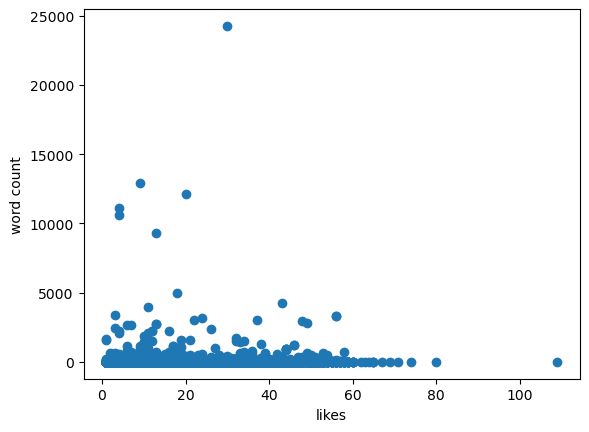

In [27]:
plt.scatter(df['word count'],df['likes'])
plt.ylabel('word count')
plt.xlabel('likes')

now we shell see all the scatter plots together to have a better view of our corralation

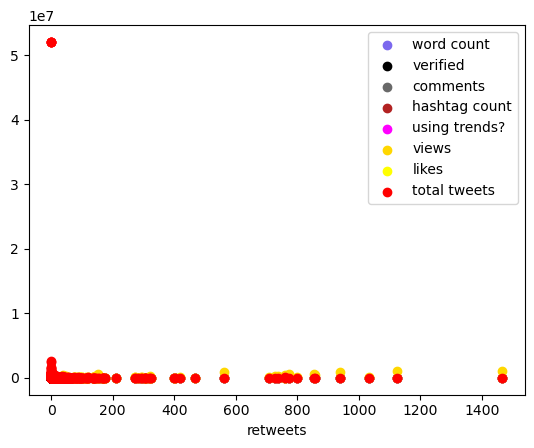

In [28]:
plt.scatter(y = df['word count'],    x = df['retweets'],c = 'mediumslateblue',label = 'word count');
plt.scatter(y = df['verified'],      x = df['retweets'],c = 'black',label = 'verified');
plt.scatter(y = df['comments'],      x = df['retweets'],c = 'dimgray',label = 'comments');
plt.scatter(y = df['hashtag count'], x = df['retweets'],c = 'firebrick',label = 'hashtag count');
plt.scatter(y = df['using trends?'], x = df['retweets'],c = 'fuchsia',label = 'using trends?');
plt.scatter(y = df['views'],         x = df['retweets'],c = 'gold',label = 'views');
plt.scatter(y = df['likes'],         x = df['retweets'],c = 'yellow',label = 'likes');
plt.scatter(y = df['total tweets'],  x = df['retweets'],c = 'red',label = 'total tweets');
#plt.scatter(y = df['quote retweets'],x = df['retweets'],c = 'lightseagreen',label = 'quote retweets');

plt.legend(numpoints = 10, loc = 0)
plt.xlabel('retweets')

plt.show()

lets also convert all of the categorical data to numerical 

In [29]:
df = df.copy()
for c in ['city','country','verified','is quote','using trends?']:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes 

In [30]:
df.reset_index(drop = True, inplace = True)


here is our one variable liner regration for each column neccery

In [31]:
#nm = ['total tweets',"verified","comments","word count","hashtag count","views","likes",'using trends?']
nm = ["verified","comments","hashtag count","views","likes",'using trends?']

models = []

for i in range(0,len(nm)):
    models.append(linear_model.LinearRegression().fit(df[[nm[i]]],df['retweets']))
    print("b1:",models[i].coef_)
    print("b0:",models[i].intercept_)
    print()

b1: [8.68680305]
b0: 1.4612068965517213

b1: [0.57007108]
b0: 1.0316880213146882

b1: [0.15871698]
b0: 1.628617486428498

b1: [0.00107848]
b0: 0.21479084634869627

b1: [0.07900992]
b0: 0.4834617638121348

b1: [0.49422235]
b0: 1.7122817181163625



lets see the R2 of each model

In [32]:
from sklearn.metrics import r2_score

for i in range(0,len(nm)): 
    print(nm[i],r2_score(df.retweets.tolist(),models[i].predict(df[[nm[i]]]).flatten()))

verified 0.004207756062020396
comments 0.35229890830294597
hashtag count 0.00015318465559321925
views 0.5961654946658099
likes 0.6765374412784495
using trends? 2.0475539083575356e-05


### While some of these are fine, we can achieve better results with multiple linear regression

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df.drop('retweets',axis = 1)
y = df['retweets']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

lr = linear_model.LinearRegression() # create a linear regression object
lr.fit(x_train, y_train);

y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.6403129039909349

after some testing, it appeared that some random states gave us better results, so will see which one gives us the best

In [34]:
max_i = 0
max_r = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    
    lr = linear_model.LinearRegression() # create a linear regression object
    lr.fit(x_train, y_train);
    
    y_pred_train = lr.predict(x_train)
    
    if r2_score(y_train,y_pred_train) > max_r:
        max_i = i
        max_r = r2_score(y_train,y_pred_train)

print(max_i,max_r)

627 0.8152665346132515


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state = 627)

lr = linear_model.LinearRegression() # create a linear regression object
lr.fit(x_train, y_train);

y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.8152665346132515

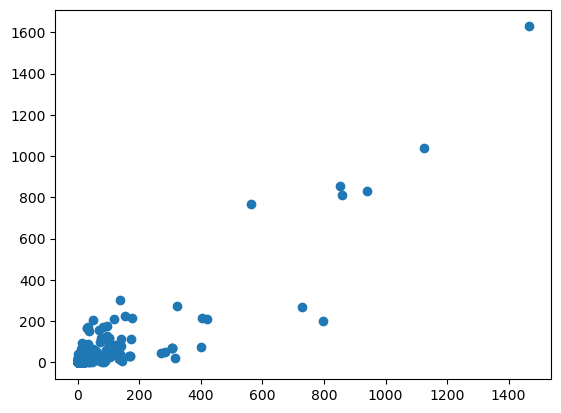

In [36]:
plt.scatter(y_train,y_pred_train)